In [1]:
import pandas as pd 
import numpy as np 
import os
import matplotlib.pyplot as plt 
os.chdir('C:\\Users\\Sanata\\Dropbox\\01AA_Insight Projects\\Restaurants')
pd.options.display.max_rows = 50

In [2]:
pmt = pd.read_csv('DOHMH_Food_Permits.csv')
pmt.head()

C:\Users\Sanata\Anaconda3\envs\insight\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (2,9,13,15,16,17,18,20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Source,License_Permit_Holder,Business_Description,License/Permit_Number,Permit_Type_Description,Permit_Subtype_Description,Permit_Issuance_Date,Permit_Expiration_Date,Permit_Status_Date,Permit_Status_Description,...,City,Zip_Code,Borough,Building_ID_No,Borough_Block_Lot,Latitude_WGS84,Longitude_WGS84,License/Permit_Holder_Name,DOB_Skilled_Trades_Lic_Num,DOB_Skilled_Trades_Lic_Type
0,DOHMH Permit,HOT JALAPENO RESTAURANT CORP.,NaN,1447631.0,FOOD SERVICE EST.,FOOD SERVICE ESTABL.,10/22/2012 00:00:00,10/31/2013 00:00:00,10/22/2012 00:00:00,NaN,...,NEW YORK,10029,MANHATTAN,1052570,1016660008,40.797814,-73.938961,"MEJIA, JAMIE E.",NaN,NaN
1,DOHMH Permit,RIGHT TASTE RESTAURANT INC,NaN,1446867.0,FOOD SERVICE EST.,FOOD SERVICE ESTABL.,01/23/2013 00:00:00,10/31/2013 00:00:00,01/23/2013 00:00:00,NaN,...,BRONX,10466,BRONX,2064799,2048680052,40.891093,-73.850918,"ERROL, SPENCER",NaN,NaN
2,DOHMH Permit,CHORSU CORP,NaN,1304742.0,FOOD SERVICE EST.,FOOD SERVICE ESTABL.,10/11/2012 00:00:00,11/30/2013 00:00:00,10/11/2012 00:00:00,NaN,...,BROOKLYN,11223,BROOKLYN,3177125,3066570053,40.604511,-73.972778,"MAKHMUDOV, MUMIN",NaN,NaN
3,DOHMH Permit,561 SOUTHERN FOOD CORP.,NaN,1235037.0,FOOD SERVICE EST.,FOOD SERVICE ESTABL.,08/28/2012 00:00:00,08/31/2013 00:00:00,10/26/2012 00:00:00,NaN,...,BRONX,10455,BRONX,2088194,2026830045,40.812702,-73.903234,"DELGADO-MORALES, MARDOMIO ROBERTO",NaN,NaN
4,DOHMH Permit,BBQ CHICKEN DON ALEX NO 1 CORP,NaN,1447036.0,FOOD SERVICE EST.,FOOD SERVICE ESTABL.,03/12/2013 00:00:00,10/31/2013 00:00:00,03/11/2013 00:00:00,NaN,...,LONG ISLAND CITY,11101,QUEENS,4036228,4014720001,40.749762,-73.881945,"DIAVIM, M. OSORES",NaN,NaN


In [3]:
pmt.dtypes

Source                          object
License_Permit_Holder           object
Business_Description            object
License/Permit_Number          float64
Permit_Type_Description         object
Permit_Subtype_Description      object
Permit_Issuance_Date            object
Permit_Expiration_Date          object
Permit_Status_Date              object
Permit_Status_Description       object
Address                         object
Street                          object
City                            object
Zip_Code                        object
Borough                         object
Building_ID_No                  object
Borough_Block_Lot               object
Latitude_WGS84                  object
Longitude_WGS84                 object
License/Permit_Holder_Name      object
DOB_Skilled_Trades_Lic_Num      object
DOB_Skilled_Trades_Lic_Type     object
dtype: object

In [5]:
#save original variables 
pmt['Permit_Expiration_Date2'] = pmt.Permit_Expiration_Date
pmt['Permit_Issuance_Date2'] = pmt.Permit_Issuance_Date 


In [6]:
#convert dates 
import datetime 
#issue 
nvalid = pmt.Permit_Issuance_Date.str.contains('[a-zA-Z]')
pmt.Permit_Issuance_Date.loc[nvalid] = '01/01/1900 00:00:00' 
hyphens = pmt.Permit_Issuance_Date2.str.contains('-')
pmt.loc[hyphens, 'Permit_Issuance_Date'] = (pmt[hyphens]
                                            .Permit_Issuance_Date
                                            .map(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d')
                                                 .strftime('%m/%d/%Y')))
pmt.loc[hyphens==False , 'Permit_Issuance_Date' ] = (pmt[hyphens==False]
                                                      .Permit_Issuance_Date
                                                      .map(lambda x: datetime.datetime.strptime(x,'%m/%d/%Y %H:%M:%S')
                                                      .strftime('%m/%d/%Y')))
pmt.Permit_Issuance_Date  = pd.to_datetime(pmt['Permit_Issuance_Date'], format='%m/%d/%Y',
                                             errors='coerce')
#expiration
nvalid = pmt.Permit_Expiration_Date.str.contains('[a-zA-Z]')
pmt.Permit_Expiration_Date.loc[nvalid] = '01/01/1900 00:00:00' 
hyphens = pmt.Permit_Expiration_Date2.str.contains('-')
pmt.loc[hyphens, 'Permit_Expiration_Date'] = (pmt[hyphens]
                                              .Permit_Expiration_Date
                                              .map(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d')
                                              .strftime('%m/%d/%Y')))
pmt.loc[hyphens==False ,  'Permit_Expiration_Date' ] = (pmt[hyphens==False]
                                                        .Permit_Expiration_Date
                                                        .map(lambda x: datetime.datetime.strptime(x,'%m/%d/%Y %H:%M:%S')
                                                        .strftime('%m/%d/%Y')))
pmt.Permit_Expiration_Date = pd.to_datetime(pmt['Permit_Expiration_Date'], format='%m/%d/%Y',
                                             errors='coerce')

In [7]:
# add year variable 
pmt['exp_year'] = pmt.Permit_Expiration_Date.dt.year
pmt['iss_year'] = pmt.Permit_Issuance_Date.dt.year

In [8]:
#clean permit holder 
#strip punctuation: .,&#
#remove CORP, INC, LLC, CORPORATION 
pmt['bus_name'] = (pmt.License_Permit_Holder
                  .str.replace('[^\w\s]', '')
                  .str.replace('CORPORATION', '')
                  .str.replace('CORP', '')
                  .str.replace('INC', '')
                  .str.replace('LLC', '')
                  .str.strip()
                  .str.replace(' ', ''))


In [9]:
#clean building ID 
pmt.Building_ID_No = pmt.Building_ID_No.str.strip()

In [10]:
##remove non-restaurants 
keep = ['FOOD SERVICE EST.', 'FOOD SERVICE ESTAB', 'FOOD SERVICE ESTAB.', 
        'FOOD SERVICE ESTABL.']
pmt = pmt[pmt.Permit_Type_Description.isin(keep)]

In [11]:
#add street address 
pmt['street_address'] = pmt.Address + ' ' + pmt.Street

C:\Users\Sanata\Anaconda3\envs\insight\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Find all restaurants open in 2010 

In [12]:
#year open 
year_open =  (pmt
              .groupby(['bus_name', 'street_address'])['iss_year']
              .min()
              .reset_index()
              .rename(index=str, columns = {'iss_year':'year_open'}))
pmt = pmt.merge(year_open, on = ['bus_name', 'street_address'], how='left')


In [13]:
#permit duration 
dur = pmt.exp_year - pmt.iss_year
dur.loc[dur<0] = np.nan
dur.loc[dur>2] = np.nan
dur.loc[dur==0] = 1
two_yr_license = (dur==2).rename('two_yr_license')
pmt = pmt.join(two_yr_license)

In [14]:
#count groupby business-location 
n_entries_listed = (pmt
                    .groupby(['bus_name', 'street_address'])['License/Permit_Number']
                    .size().rename('n_entries_listed')
                    .reset_index())
pmt = pmt.merge(n_entries_listed, on = ['bus_name', 'street_address'], how='left')

In [15]:
#add to pmt 
pmt['n_years_open'] = pmt.n_entries_listed 
pmt.n_years_open.loc[pmt.two_yr_license] = pmt.n_entries_listed.loc[pmt.two_yr_license] *2

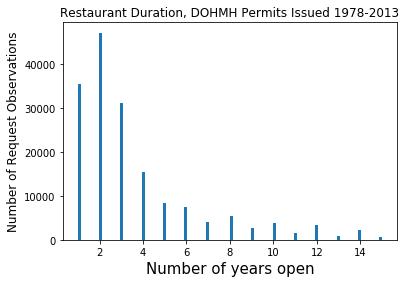

In [16]:
plt.hist(pmt.n_years_open[pmt.n_years_open<=15].dropna(), bins=100)
plt.title('Restaurant Duration, DOHMH Permits Issued 1978-2013')
plt.xlabel('Number of years open', fontsize=15)
plt.ylabel('Number of Request Observations', fontsize=12)
plt.savefig('rest_duration_global.png')

In [17]:
#year closed 
pmt['year_closed'] = pmt.year_open + pmt.n_years_open
pmt.loc[pmt.year_open==1900, 'year_closed'] = pmt.loc[pmt.year_open==1900, 'exp_year'] + pmt.loc[pmt.year_open==1900, 'n_years_open']


Find all restaurants closed AFTER 2010 (all businesses open in 2010)

In [18]:
open_2010 = pmt[pmt.year_closed>2010]
open_2010 = open_2010[open_2010.n_years_open<=15] #keep open 15 yrs or less
open_2010.drop_duplicates(['bus_name','street_address']).shape #24K restaurant locations open in 2010 

(24574, 33)

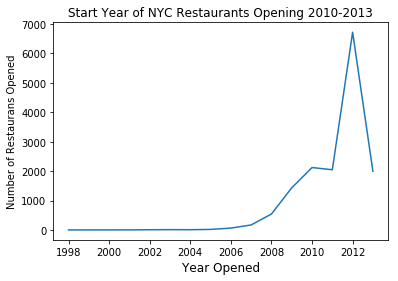

In [19]:
n = open_2010.drop_duplicates(['bus_name','street_address']).groupby('year_open')['year_open'].count()
plt.plot(n.loc[1998:])
plt.xlabel('Year Opened', fontsize=12)
plt.ylabel('Number of Restaurans Opened')
plt.title('Start Year of NYC Restaurants Opening 2010-2013', fontsize=12)
plt.savefig('rest_open_year.png')


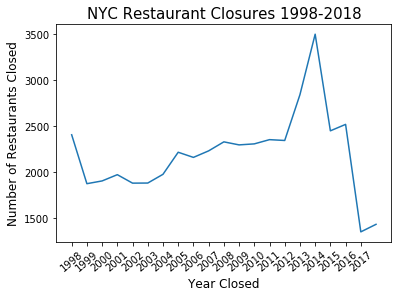

In [20]:
n = pmt.drop_duplicates(['bus_name','street_address']).groupby('year_closed')['year_closed'].count()
plt.plot(n.loc[1998:2018])
plt.xlabel('Year Closed', fontsize=12)
plt.ylabel('Number of Restaurants Closed', fontsize=12)
plt.title('NYC Restaurant Closures 1998-2018', fontsize=15)
plt.xticks(np.arange(1998,2018), rotation=40)
plt.savefig('rest_close_year.png')

In [21]:
#lat/long
check = open_2010.Latitude_WGS84.str.contains('[a-zA-Z]')
open_2010 = open_2010[check==False]
open_2010.Latitude_WGS84 = open_2010.Latitude_WGS84.astype('float64')
open_2010.Longitude_WGS84 = open_2010.Longitude_WGS84.astype('float64')

In [22]:
#fix zip code 
open_2010.Zip_Code.unique()
open_2010.Zip_Code.loc[open_2010.Zip_Code.isnull()] = '0'
open_2010.Zip_Code.loc[open_2010.Zip_Code=='     '] = '0'
open_2010.Zip_Code = (open_2010.Zip_Code
                      .astype('str')
                      .map(lambda x: str(x)[:5])
                      .astype('int64')
                     )

Identify chains, making sure to differentiate from management companies 

In [33]:
n = (open_2010
     .groupby(['bus_name'])['street_address']
     .count()
     .rename('nlocs')
     .reset_index()) 

In [34]:
open_2010 = open_2010.merge(n, on='bus_name', how='left')

In [35]:
open_2010['is_chain'] = None 
open_2010.loc[open_2010.nlocs>=3, 'is_chain'] = 1 
open_2010.loc[open_2010.nlocs<3, 'is_chain']= 0 

More data cleaning and variables 

In [36]:
#BBL 
check = open_2010.Borough_Block_Lot.str.contains('[a-zA-Z]')
open_2010.Borough_Block_Lot = open_2010.Borough_Block_Lot.astype('int64')


In [37]:
#add residential zone designation 
zones = pd.read_csv('NY_ZoningTaxLotDB20181221.csv')
zones['zoning1'] = zones['Zoning District 1']

zones['ztype'] = zones.zoning1.apply(lambda x: str(x)[0])
zones.BBL = zones.BBL.astype('int64')

open_2010 = open_2010.merge(zones[['BBL', 'ztype']], left_on ='Borough_Block_Lot' , right_on = 'BBL', 
                how = 'left')

C:\Users\Sanata\Anaconda3\envs\insight\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (5,6,7,8,9,10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [38]:
#add sales by zip code 
sales = pd.read_csv('restaurant_sales_zipcode.csv', skiprows=1)
#only restaurants 
sales = sales[sales['Meaning of 2012 NAICS code']== 'Restaurants and other eating places']
#CHECK IF ALL NYC 
sales = sales[(sales.Id2 >=10000) & (sales.Id2 <= 11697)]
#sales['Geographic area name'].unique()
sales.columns = ['geoid_code', 'zipcode', 'zipcode_name', 'naics_code', 
                 'naics_code_label', 'sales_range_code', 'sales_range_label', 
                 'year', 'n_estab']

In [40]:
n_all_restaurants = sales.loc[sales.sales_range_code==2, ['zipcode', 'n_estab']]
n_all_restaurants = n_all_restaurants.set_index(n_all_restaurants.zipcode)


In [41]:
n_sales_100k = (sales
                         .n_estab[sales.sales_range_code==114]
                         .rename(sales.zipcode[sales.sales_range_code==114])
                         .rename('n_sales_100k')
                    )

n_sales_250k = (sales
                         .n_estab[sales.sales_range_code==123]
                         .rename(sales.zipcode[sales.sales_range_code==123])
                         .rename('n_sales_250k')
                    )

n_sales_500k = (sales
                         .n_estab[sales.sales_range_code==125]
                         .rename(sales.zipcode[sales.sales_range_code==125])
                         .rename('n_sales_500k')
                    )

n_sales_999k  = (sales
                         .n_estab[sales.sales_range_code==131]
                         .rename(sales.zipcode[sales.sales_range_code==131])
                         .rename('n_sales_999k')
                    )

n_sales_1m = (sales
                         .n_estab[sales.sales_range_code==132]
                         .rename(sales.zipcode[sales.sales_range_code==132])
                         .rename('n_sales_1m')
                    )


test = n_all_restaurants.join(n_sales_100k )
test = test.join(n_sales_250k)
test = test.join(n_sales_500k)
test = test.join(n_sales_999k)
test = test.join(n_sales_1m)
sales_dat = test.drop_duplicates('zipcode')

In [42]:
#merge to full dataset 
open_2010 = open_2010.merge(sales_dat, left_on = 'Zip_Code' , right_on = 'zipcode', 
                how = 'left' )


In [44]:
# avenue indicator 
check = open_2010.Street.str.contains('AVENUE')
open_2010['on_avenue'] = None 
open_2010.loc[check, 'on_avenue'] = 1
open_2010.loc[check==False, 'on_avenue'] = 0

In [45]:
open_2010.to_pickle('all_2010_restaurants')

Add Census Data 

In [46]:
rest_loc = pd.read_csv('C:\\Users\\Sanata\\Dropbox\\01AA_Insight Projects\\Restaurants\\restaurants_in_census_blocks.csv')
keep_vars = ['bus_name', 'Id', 'total_block_pop', 'mean_block_income', 'tract_id',
             'COUNTYFP10', 'TRACTCE10', 'BLKGRPCE10', 'GEOID10', 'INTPTLAT10',
       'INTPTLON10',
       'n_hisp', 'n_total_tract_pop', 'n_foreign_born_naturalized',
       'n_foreign_born_not_citizen', 'n_naturalized_asia',
       'n_naturalized_africa', 'n_naturalized_la', 'n_noncit_asia',
       'n_noncit_africa', 'n_noncit_la', 'n_white', 'n_black', 'n_amer_ind',
       'n_asian', 'n_pi', 'under18', '18_24', '25_34', '35-44', '45-59',
       '60plus', 'area_sqkm', 'block_pop_dens']

In [47]:
final = open_2010.merge(rest_loc[keep_vars], 
                        #on = ['bus_name', 'Building_ID_No'], 
                        how = 'left')

Calculate block variables 

In [48]:
#calculate duration by census block 
yrs_by_block = final.groupby('Id')['n_years_open'].mean().reset_index().rename(index=str, columns = {'n_years_open':'block_duration'})
final = final.merge(yrs_by_block, on = ['Id'], how = 'left' )   

#calculate n_restaurants by tract
nrest_by_tract = final.groupby('TRACTCE10')['Building_ID_No'].size().reset_index().rename(index=str, columns = {'Building_ID_No':'nrest_by_tract'})
final = final.merge(nrest_by_tract, on = ['TRACTCE10'], how = 'left' )   

#calculate n_restaurants by block
nrest_by_block = final.groupby('Id')['Building_ID_No'].size().reset_index().rename(index=str, columns = {'Building_ID_No':'nrest_by_block'})
final = final.merge(nrest_by_block, on = ['Id'], how = 'left' )   

In [49]:
#AGE AND RACE 
block_ns_race = ['n_hisp', 'n_white', 'n_black',
                    'n_amer_ind', 'n_asian', 'n_pi']

block_ns_age = [ 'under18', '18_24', '25_34', '35-44',
       '45-59', '60plus']

final['total_race_pop'] = final[block_ns_race].sum(axis=1)
final['total_age_pop'] = final[block_ns_age].sum(axis=1)

get_pct = final[block_ns_race].divide(final.total_race_pop, 'index')
get_pct.columns = ['pct_hisp', 'pct_white', 'pct_black', 'pct_amerind', 
                   'pct_asian', 'pct_pi']
final = final.join(get_pct)

get_pct = final[block_ns_age].divide(final.total_age_pop, 'index')
get_pct.columns = ['pct_under18', 'pct_18_24', 
                   'pct_25_34', 'pct_35_44', 'pct_45_59', 'pct_60plus']
final = final.join(get_pct)

In [50]:
#add borough dummies 
t = pd.get_dummies(final.Borough)
final = final.join(t)

#add number of chains by block 
chains_by_block = final.groupby('Id')['is_chain'].sum().reset_index().rename(index=str, columns = {'is_chain':'chains_by_block'})
final = final.merge(chains_by_block, on = ['Id'], how = 'left' )   


In [51]:
#add sales 
sales_pct = sales_dat.iloc[:, 2:7].divide(sales_dat.n_estab, 'index').reset_index().rename(index=str, columns = {'index':'zipcode'})
final = final.merge(sales_pct, left_on='Zip_Code', right_on='zipcode', how='left')

#change income 
medinc = pd.read_csv('C:\\Users\\Sanata\\Dropbox\\01AA_Insight Projects\\Restaurants\\population data\\med_block_income.csv')
medinc.med_block_income = medinc.med_block_income.str.replace('[^\w\s]', '').astype('float64')
final = final.merge(medinc[['Id', 'med_block_income']], on = 'Id')

#dummies for zone type 
d = pd.get_dummies(final.ztype, prefix='ztype_', drop_first=True)
final = final.join(d[['ztype__C', 'ztype__R']])



In [54]:
# ADD 500 ft buffer variables 
buffers = pd.read_csv('restaurants_buffer.csv', usecols = [1, 2, 3, 4 ])
buffers.Building_ID_No = buffers.Building_ID_No.astype('O')

In [55]:
buffers.head()

,bus_name,Building_ID_No,n_restaurants_500,n_subway_ent
0,1 AGUAPANELAS,4064657,7,3.0
1,1 CHIMI SUSHI,1019865,17,0.0
2,1 EAST 66TH STREET,1041159,5,0.0
3,1 PANDA,1017884,8,0.0
4,1 PERRY ST RESTAURANT,1010939,12,0.0


In [62]:
final = final.merge(buffers, on = ['bus_name', 'Building_ID_No'], how='left')


In [63]:
final['subway500'] = None 
final.loc[final.n_subway_ent>0, 'subway500'] = 1
final.loc[final.n_subway_ent==0, 'subway500'] = 0

In [64]:
### SAVE FINAL DATASET ### 
final.to_pickle('C:\\Users\\Sanata\\Dropbox\\01AA_Insight Projects\\Restaurants\\restaurant_final_data_v2')